# Probablistic Inference with pyAgrum

In this notebook, we will show different basic features for probabilistic inference on Bayesian Networks using pyAgrum.

First we need some external modules:

In [1]:
import os 

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

## Basic inference and display

Then we import pyAgrum and the pyAgrum's notebook module, that offers very usefull methods when writting a notebook.

This first example shows how you can load a BayesNet and show it as graph. Note that pyAgrum handles serveral BayesNet file format such as DSL, BIF and UAI.

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
bn=gum.loadBN(os.path.join("res","alarm.dsl"))
gnb.showBN(bn,size="9",format="svg")

From there, it is easy to get a posterior using an inference engine :

In [3]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
print(ie.posterior(bn.idFromName("CATECHOL")))

<CATECHOL:NORMAL> :: 0.0511754 /<CATECHOL:HIGH> :: 0.948825


But since we are in notebook, why not use pyAgrum notebook's methods ?

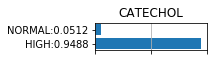

In [4]:
gnb.showPosterior(bn,evs={},target='CATECHOL')

You may also want to see the graph with some posteriors

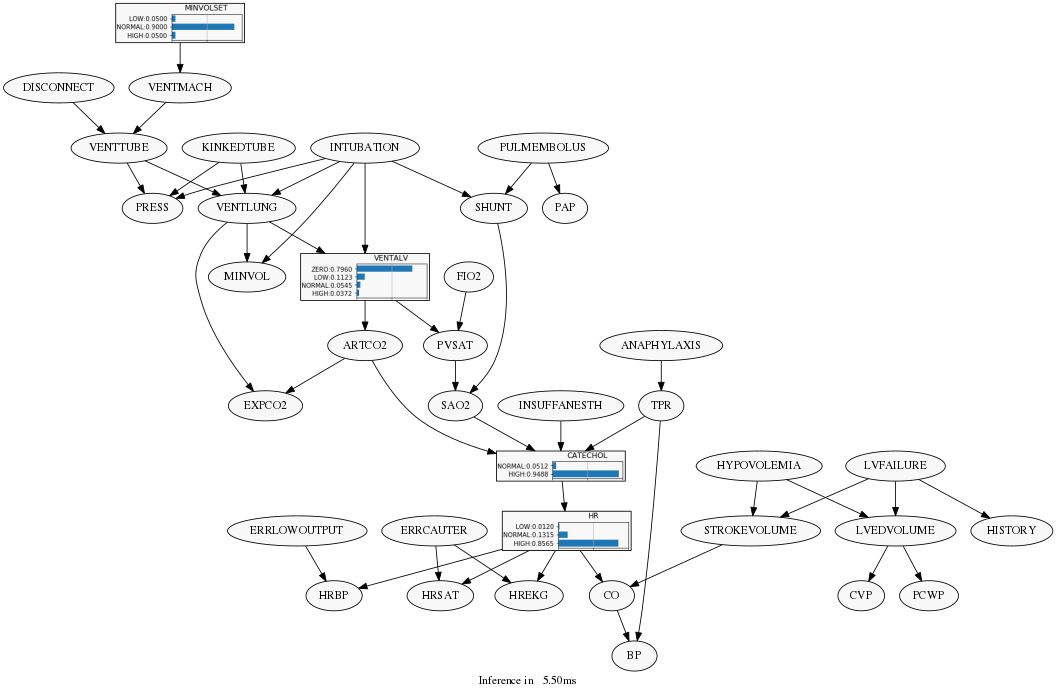

In [5]:
# due to matplotlib, format is forced to png.
gnb.showInference(bn,evs={},targets={"VENTALV","CATECHOL","HR","MINVOLSET"},size="11")

.. and then observe the impact of evidence :

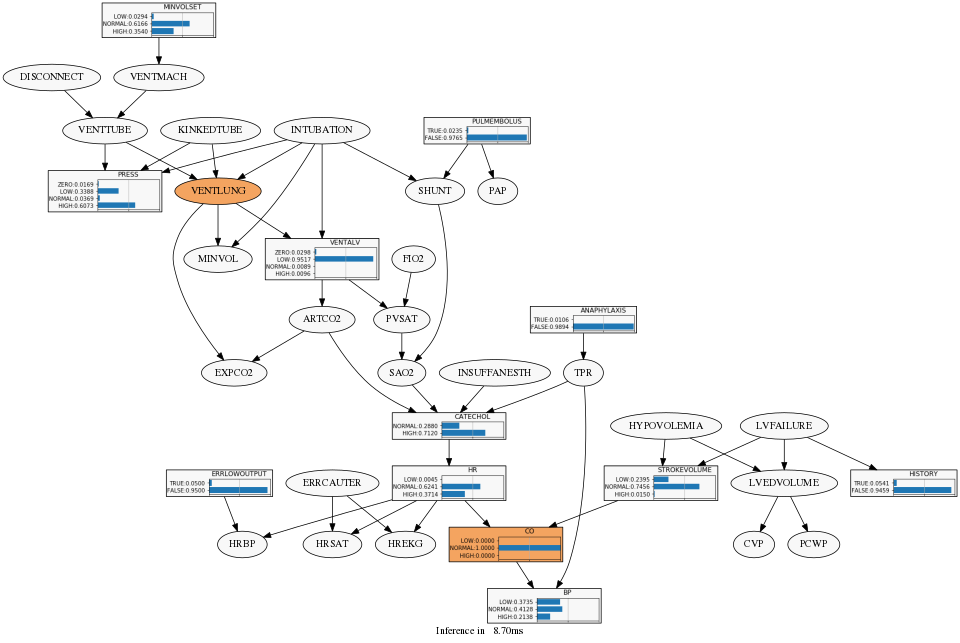

In [6]:
gnb.showInference(bn,
                  evs={"CO":1,"VENTLUNG":1},
                  targets={"VENTALV",
                           "CATECHOL",
                           "HR",
                           "MINVOLSET",
                           "ANAPHYLAXIS",
                           "STROKEVOLUME",
                           "ERRLOWOUTPUT",
                           "HBR",
                           "PULMEMBOLUS",
                           "HISTORY",
                           "BP",
                           "PRESS",
                           "CO"},
                  size="10")

You can even compute all posteriors by leaving the `targets` parameter empty (which is its default value).

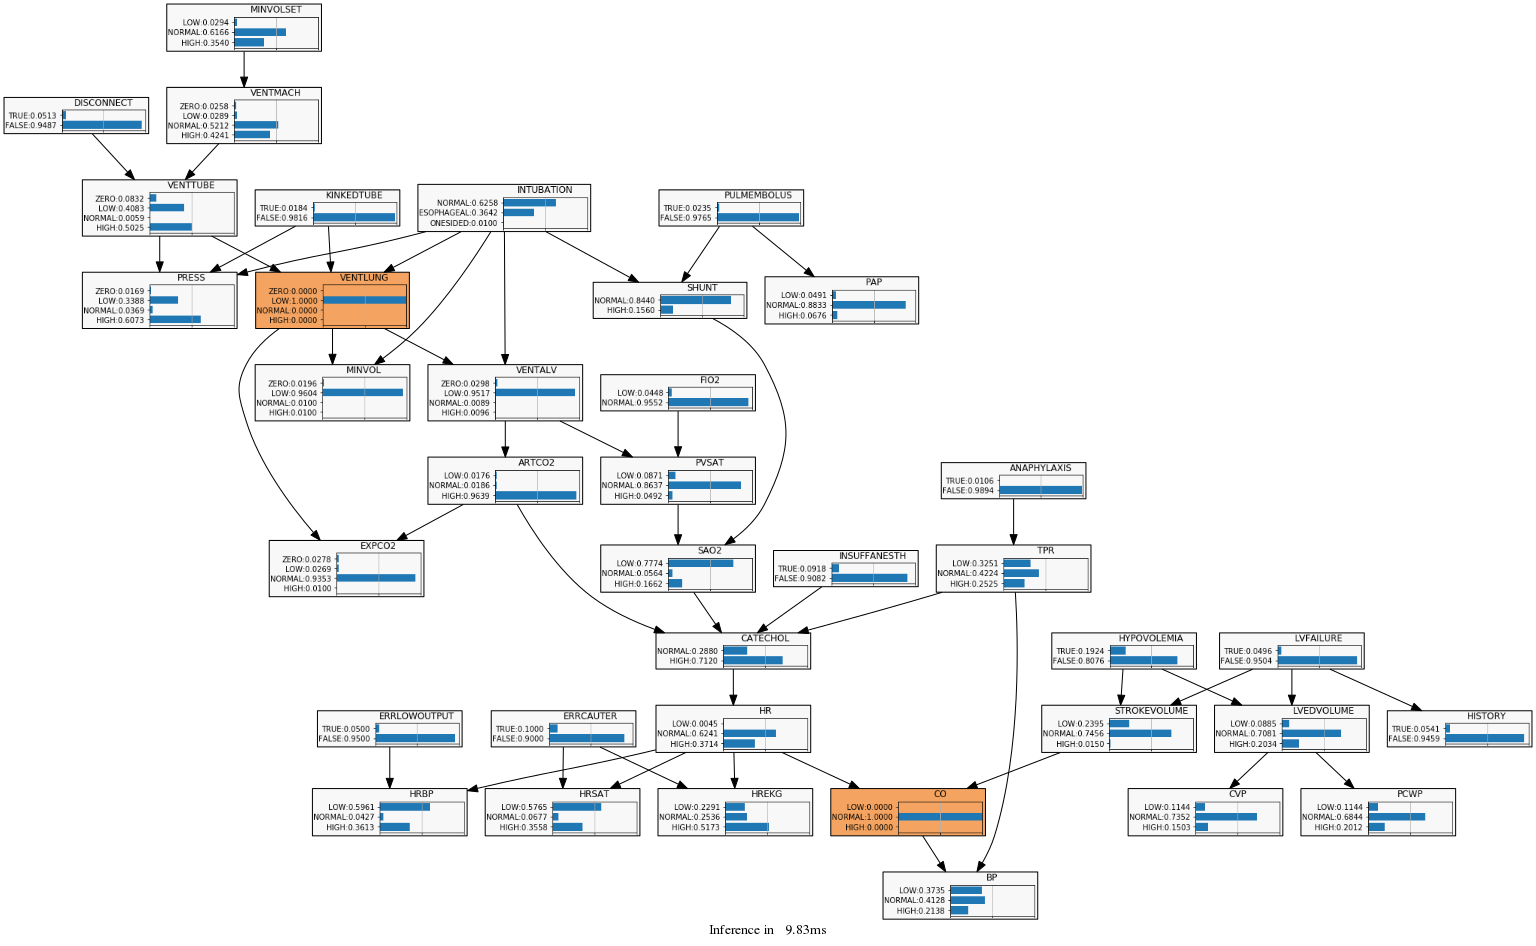

In [7]:
gnb.showInference(bn,evs={"CO":1,"VENTLUNG":1},size="16")

## Showing the information graph

To have a <em>global</em> view of the knowledge brought by the inference, you can also draw the entropy of all nodes

In [8]:
gnb.showInformation(bn,{},size="20")

... and then observe the impact of an evidence on the whole bayes network :

In [9]:
gnb.showInformation(bn,{"CO":0},size="9")

## Exploring the junction tree

Lazy Propagation, like several other inference algorithms, uses a junction tree to propagate information.

You can also show the junction tree used by Lazy Propagation with pyAgrum:

In [10]:
jt=ie.junctionTree()
gnb.showJunctionTree(bn,size="10",format='svg')

### Introspection in junction trees

One can easily walk through the junction tree.

In [11]:
for n in jt.nodes():
    print([bn.variable(n).name() for n in jt.clique(n)])

['CVP', 'LVEDVOLUME']
['FIO2', 'VENTALV', 'PVSAT']
['ARTCO2', 'EXPCO2', 'VENTLUNG']
['VENTMACH', 'MINVOLSET']
['VENTMACH', 'DISCONNECT', 'VENTTUBE']
['PRESS', 'KINKEDTUBE', 'INTUBATION', 'VENTTUBE']
['ANAPHYLAXIS', 'TPR']
['HRBP', 'ERRLOWOUTPUT', 'HR']
['LVFAILURE', 'HISTORY']
['HREKG', 'HR', 'ERRCAUTER']
['PCWP', 'LVEDVOLUME']
['PAP', 'PULMEMBOLUS']
['SHUNT', 'INTUBATION', 'PULMEMBOLUS']
['HRSAT', 'HR', 'ERRCAUTER']
['LVFAILURE', 'HYPOVOLEMIA', 'LVEDVOLUME']
['HYPOVOLEMIA', 'STROKEVOLUME', 'LVFAILURE']
['CO', 'BP', 'TPR']
['INTUBATION', 'VENTLUNG', 'MINVOL']
['KINKEDTUBE', 'INTUBATION', 'VENTTUBE', 'VENTLUNG']
['ARTCO2', 'SAO2', 'INSUFFANESTH', 'TPR', 'CATECHOL']
['CO', 'STROKEVOLUME', 'HR']
['CO', 'CATECHOL', 'HR']
['CO', 'TPR', 'CATECHOL']
['INTUBATION', 'SHUNT', 'PVSAT', 'SAO2']
['INTUBATION', 'ARTCO2', 'PVSAT', 'SAO2']
['ARTCO2', 'VENTALV', 'INTUBATION', 'PVSAT']
['VENTALV', 'INTUBATION', 'ARTCO2', 'VENTLUNG']


In [12]:
for e in jt.edges():
    print("Separator for {0} : {1}".
          format(e,
                 jt.clique(e[0]).intersection(jt.clique(e[1]))))

Separator for (11, 16) : {15}
Separator for (23, 31) : {26, 28}
Separator for (24, 26) : {34, 31}
Separator for (0, 16) : {15}
Separator for (30, 31) : {2, 27, 28}
Separator for (4, 22) : {20}
Separator for (14, 26) : {31}
Separator for (13, 30) : {18, 2}
Separator for (22, 33) : {2, 22}
Separator for (31, 32) : {27, 26, 2}
Separator for (32, 33) : {25, 2, 26}
Separator for (16, 17) : {1, 9}
Separator for (12, 13) : {4}
Separator for (17, 24) : {13}
Separator for (5, 22) : {0, 2, 20}
Separator for (1, 32) : {25, 27}
Separator for (6, 23) : {14}
Separator for (8, 17) : {9}
Separator for (26, 27) : {34, 30}
Separator for (7, 26) : {31}
Separator for (20, 33) : {2, 22}
Separator for (19, 27) : {34, 14}
Separator for (2, 33) : {26, 22}
Separator for (10, 14) : {7, 31}
Separator for (23, 27) : {14, 30}
Separator for (3, 4) : {16}


In [13]:
jt.hasRunningIntersection()

True